# Import Libraries

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import os

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

os.getcwd()
#os.chdir('Documents/')

'/Users/zacharyellis/Documents'

# Cleaning and Filtering Data

In [ ]:
# load activities from Strava
run_report = 'run_report.xlsx'
df = pd.read_excel(run_report)

# del any unneeded cols
df = df.drop(columns=['moving_time', 'Pace (2)', 'Pace (3)', 'Pace (4)', 'Unnamed: 11'])

# Main DF is filtered by date
df['start_date'] = pd.to_datetime(df['start_date'])
df = df.sort_values(by='start_date',ascending=False)

# apply filter to only see races
race_filter = df['isRace']=='Yes'
df_all_races = df[race_filter]
df_race_2021 = df_all_races[:4]
df_race_2020 = df_all_races[4:8]
df_race_2019 = df_all_races[8:]

# apply filter to only see training
training_filter = df['isRace']=='No'
df_all_training = df[training_filter]

In [29]:
df

,id,start_date,distance,isRace,Pace,Pace Time,activity_url
283,6.621650e+09,2022-02-02,0.70,No,10.183333,10.11,https://www.strava.com/activities/6621649664
119,6.621650e+09,2022-02-02,2.84,No,7.133333,7.08,https://www.strava.com/activities/6621649811
188,6.594420e+09,2022-01-28,1.57,No,7.266667,7.16,https://www.strava.com/activities/6594420094
56,6.586049e+09,2022-01-26,4.26,No,6.950000,6.57,https://www.strava.com/activities/6586048823
196,6.579233e+09,2022-01-25,1.40,No,8.250000,8.15,https://www.strava.com/activities/6579232521
...,...,...,...,...,...,...,...
139,2.652800e+09,2019-08-26,2.32,No,7.383333,7.23,https://www.strava.com/activities/2652800221
9,6.628180e+09,2019-03-12,13.10,Yes,9.150000,9.09,https://www.strava.com/activities/6628179510
13,6.628172e+09,2019-02-19,9.32,Yes,7.633333,7.38,https://www.strava.com/activities/6628172474
31,6.628159e+09,2019-02-02,6.20,Yes,7.000000,7.00,https://www.strava.com/activities/6628158609


# 2019 Training

# 2019 Races

# 2020 Training

# 2020 Races

# 2021 Training/Races

# 2022: Predictions

# Plot All Races

In [21]:
def race_2021():
    x = df_race_2021.loc[:, 'distance'].values
    y = df_race_2021.loc[: , 'Pace'].values
    plt.scatter(x, y, c='k')
    
def race_2020():
    x = df_race_2020.loc[:, 'distance'].values
    y = df_race_2020.loc[: , 'Pace'].values
    plt.scatter(x, y, c='k')
    
def race_2019():
    x = df_race_2019.loc[:, 'distance'].values
    y = df_race_2019.loc[: , 'Pace'].values
    plt.scatter(x, y, c='k')

In [22]:
def plot_all_races():
    race_2021()
    race_2020()
    race_2019()

    # format graph
    plt.title('All Races')
    plt.xlim(2.5, 51)
    plt.ylim(5, 13.8)
    plt.gca().invert_yaxis()

    plt.xlabel('Distance (mi)')
    plt.ylabel('Minutes per Mile')
    # plt.legend(loc="upper right")

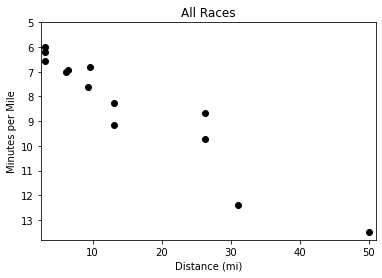

In [23]:
plot_all_races()

# Regression

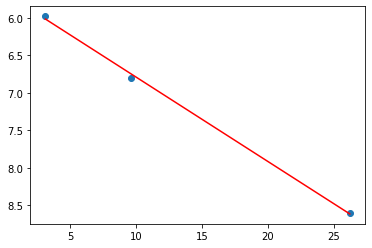

In [24]:
# all races
x = np.array([3.1,
              9.6,
              26.2]).reshape((-1, 1))


y = np.array([5.98,
              6.8,
              8.6])


model = LinearRegression().fit(x, y)

# print('coefficient of determination:', model.score(x,y))
# print('intercept:', model.intercept_)
# print('slope:', model.coef_)

y_pred = model.predict(x)

plt.scatter(x, y)
plt.gca().invert_yaxis()
plt.plot(x, y_pred, color='red')
plt.show()

# Plot Races by Year

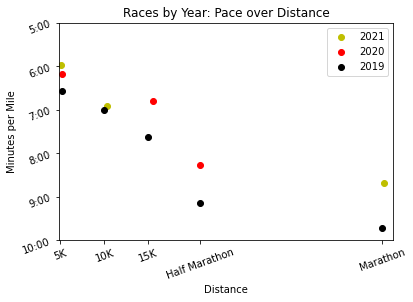

In [25]:
# 2021 races
#df_race_2021.to_numpy
distance_number = df_race_2021.loc[:, 'distance'].values
pace_number = df_race_2021.loc[: , 'Pace'].values
plt.scatter(distance_number, pace_number, c='y', label='2021')
#plt.scatter(distance_number, pace_number, c='k',)

# 2020 races
# df_race_2020.to_numpy
dist_race_2020 = df_race_2020.loc[:, 'distance'].values
pace_race_2020 = df_race_2020.loc[:, 'Pace'].values
plt.scatter(dist_race_2020, pace_race_2020, c='r', label='2020')
# plt.scatter(dist_race_2020, pace_race_2020, c='k')

# 2019 races
# df_race_2019.to_numpy
dist_race_2019 = df_race_2019.loc[:, 'distance'].values
pace_race_2019 = df_race_2019.loc[:, 'Pace'].values
plt.scatter(dist_race_2019, pace_race_2019, c='k', label='2019')

# format graph
plt.xlim(-2, 20)
plt.ylim(5, 10)
plt.gca().invert_yaxis()
plt.title('Races by Year: Pace over Distance')
plt.xlim(2.9, 27)
plt.xlabel('Distance')
plt.ylabel('Minutes per Mile')
plt.legend(loc="upper right")


plt.yticks([5,6,7,8,9,10], ['5:00', '6:00', '7:00', '8:00', '9:00', '10:00' ], rotation=20)  # Set text labels and properties.

plt.xticks([3, 6.2, 9.3, 13.1, 26.2], ['5K', '10K', '15K', 'Half Marathon', 'Marathon'], rotation=20)  # Set text labels and properties

plt.savefig("report.png")

# Running Statistics

In [26]:
x = np.array([df_all_races['distance']])
y = np.array([df_all_races['Pace']])

# gathered from x.mean(), y.mean()
avg_race_pace = '8.25'
avg_race_dist = '15 miles'

# Converted 8.42 minutes, to minutes per mile: (.42 * 60) / 100
print("Avg Distance all races: " + avg_race_dist)
print("Avg Pace all races: " + avg_race_pace)
print("Standard Deviation Pace all races: " + str(y.std()))
print("Standard Deviation Distance all races: " + str(x.std()))


Avg Distance all races: 15 miles
Avg Pace all races: 8.25
Standard Deviation Pace all races: 2.2420276759964977
Standard Deviation Distance all races: 13.525887736235816


# Plot Training, plot training and races together

In [27]:
df_all_training['distance']

283    0.70
119    2.84
188    1.57
56     4.26
196    1.40
       ... 
14     9.10
59     4.19
157    2.22
41     5.06
139    2.32
Name: distance, Length: 298, dtype: float64

In [28]:
def plot_all_training():
    df_all_training.to_numpy
    training_distance = df_all_training.loc[:, 'distance'].values
    training_pace_num = df_all_training.loc[:, 'Pace'].values
    # plt.gca().invert_yaxis()
    plt.scatter(training_distance, training_pace_num, c='y', label='Training')

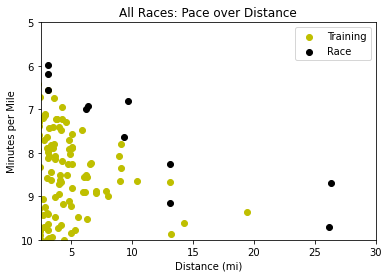

In [82]:
plot_all_training()
plot_all_races()

# Metrics: Avg Race Pace, Avg Training Pace, Avg Distance Race, Avg Distance Mile